In [98]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imoore/60k-stack-overflow-questions-with-quality-rate")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/imoore/60k-stack-overflow-questions-with-quality-rate/versions/13


# Phase 1: Preprocessing

In [99]:
import nltk

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
## 1.1 Load and Explore the Dataset
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import numpy as np
import warnings

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

warnings.filterwarnings("ignore")  # Ignore warnings globally

# Load training and validation datasets
data = pd.read_csv('/root/.cache/kagglehub/datasets/imoore/60k-stack-overflow-questions-with-quality-rate/versions/13/train.csv')
validation_data = pd.read_csv('/root/.cache/kagglehub/datasets/imoore/60k-stack-overflow-questions-with-quality-rate/versions/13/valid.csv')

# Display basic information
print(data.info())
print(validation_data.info())
data.head()
validation_data.head()

# Load stopwords and initialize lemmatizer and stemmer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove non-alphanumeric characters and lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text).lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    # Perform lemmatization and stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Merge Title and Body columns
data['merged_text'] = data['Title'] + ' ' + data['Body']
validation_data['merged_text'] = validation_data['Title'] + ' ' + validation_data['Body']

# Tokenize cleaned text into words
data['tokenized_body'] = data['merged_text'].apply(clean_text).apply(lambda x: x.split())
validation_data['tokenized_body'] = validation_data['merged_text'].apply(clean_text).apply(lambda x: x.split())

# Save cleaned data for further use
data.to_csv('cleaned_train.csv', index=False)
validation_data.to_csv('cleaned_valid.csv', index=False)

data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            45000 non-null  int64 
 1   Title         45000 non-null  object
 2   Body          45000 non-null  object
 3   Tags          45000 non-null  object
 4   CreationDate  45000 non-null  object
 5   Y             45000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            15000 non-null  int64 
 1   Title         15000 non-null  object
 2   Body          15000 non-null  object
 3   Tags          15000 non-null  object
 4   CreationDate  15000 non-null  object
 5   Y             15000 non-null  object
dtypes: int64(1), object(5)
memory usage: 703.3+ KB
None


,Id,Title,Body,Tags,CreationDate,Y,merged_text,tokenized_body
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,Java: Repeat Task Every Random Seconds <p>I'm ...,"[java, repeat, task, every, random, second, al..."
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,Why are Java Optionals immutable? <p>I'd like ...,"[java, optionals, immutable, like, understand,..."
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,Text Overlay Image with Darkened Opacity React...,"[text, overlay, image, darkened, opacity, reac..."
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,Why ternary operator in swift is so picky? <p>...,"[ternary, operator, swift, picky, question, si..."
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,hide/show fab with scale animation <p>I'm usin...,"[hide, show, fab, scale, animation, using, cus..."


# Phase 2: Word2Vec & Similarity Retrieval

0    every
1    docker
2    getstring
3    mov
4    v7
5    understand
6    problem
7    trying
8    running
9    springframework
10    want
11    question
12    thing
13    file
14    documentation
15    extent1
16    also
17    able
18    solution
19    ctx
20    sure
21    possible
22    need
23    use
24    python
25    see
26    however
27    different
28    seems
29    version
30    installed
31    even
32    without
33    still
34    work
35    know
36    gettext
37    would
38    zygoteinit
39    savedinstancestate
40    project
41    one
42    install
43    settext
44    k141
45    layoutinflater
46    way
47    findviewbyid
48    000h
49    activitythread


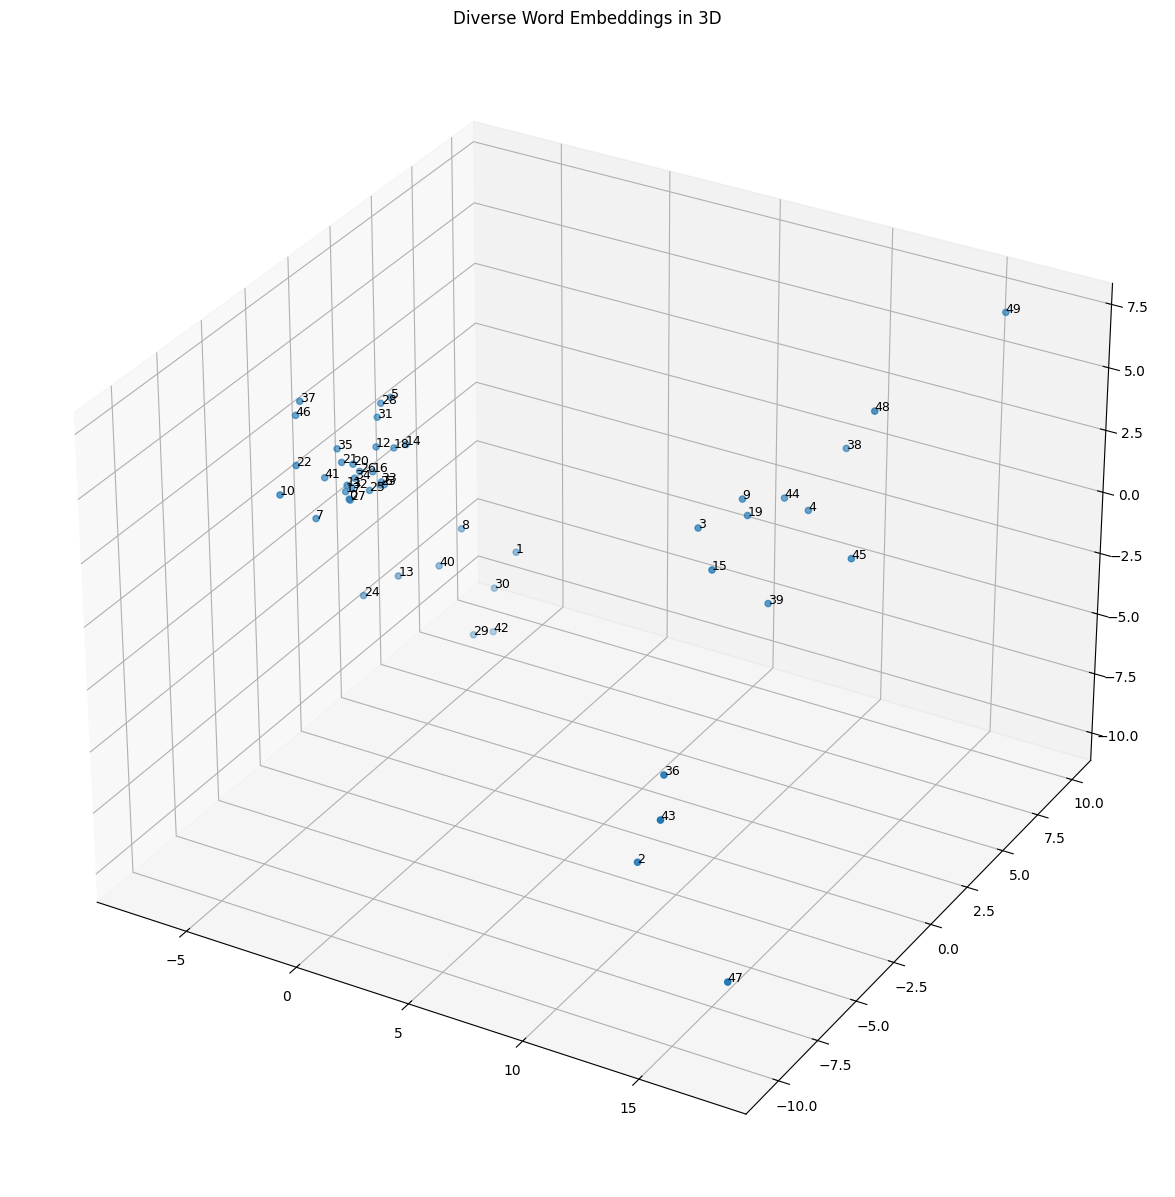

0    Cannot run downloaded project on Android Studio
1    Need to expand an inventory journal (log) pandas dataframe to include all dates per product id
2    Sort a array to form three array
3    i have a one matrix 5*5 ,i want to print that matrix into 2*2 as many as possible matrices comes?
4    How to make item pairs from the same big list in python
5    get a cv::Mat to 2 by 2 maximum value mean?
6    how to add a number to the array using php
7    Bipartity graph c++
8    Reshape data in R: transpose
9    SQL: Get all rows where ID occurs
10    how to search with no of occurences in factor in R?
11    grouping the batch in sql server
12    What does this mean **&a in C++
13    Why I got x=0.15000000000000002 during adding 0.050 in each step using while lopp in python
14    Using multiple indicies to grab values from 2D MATLAB array without returning all combinations
15    What is the output of this C program?
16    How do you convert a two dimensional list into a list for each row

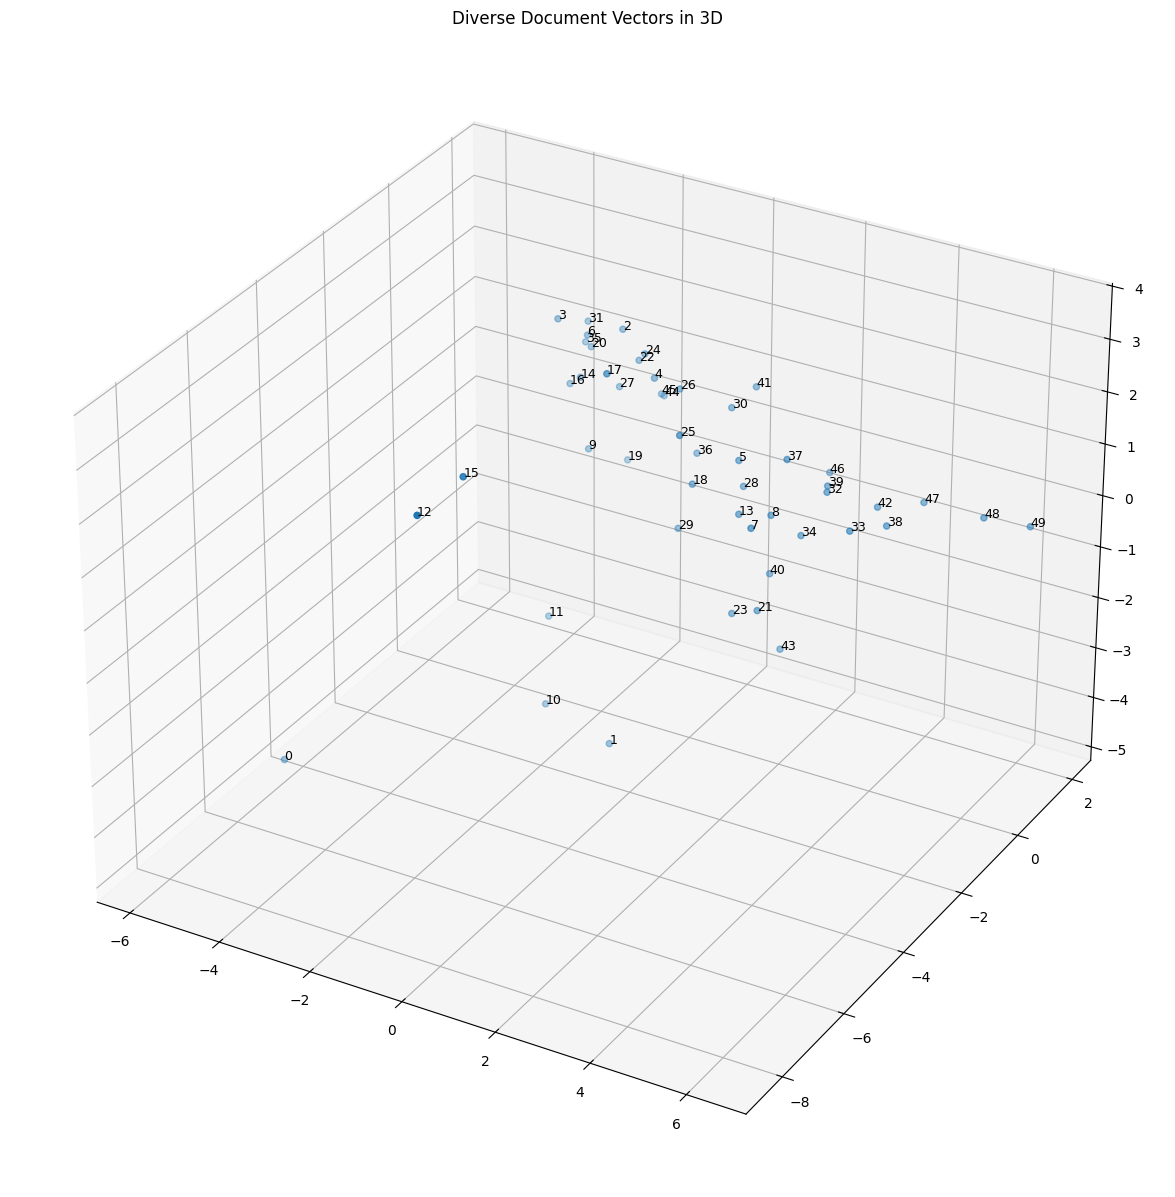

In [101]:
## 2.1 Train Word2Vec Model
from gensim.models import Word2Vec
import random
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=data['tokenized_body'], vector_size=100, window=5, min_count=2, workers=2)

# Save the Word2Vec model
word2vec_model.save('word2vec_model.model')

## 2.2 Visualize Word Embeddings in 3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Retrieve the word vectors
words = list(word2vec_model.wv.index_to_key)
word_vectors = word2vec_model.wv[words]

# Select words to ensure diverse scattering
pca_full = PCA(n_components=2)
reduced_full = pca_full.fit_transform(word_vectors)

# Choose words that maximize scatter
scatter_indices = np.argsort(np.sum(reduced_full ** 2, axis=1))[-50:]
scatter_words = [words[i] for i in scatter_indices]
scatter_vectors = [word_vectors[i] for i in scatter_indices]

# Reduce dimensions to 3D for plotting
pca_scatter = PCA(n_components=3)
scatter_reduced_vectors = pca_scatter.fit_transform(scatter_vectors)

# Plot the 3D visualization for word vectors
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scatter_reduced_vectors[:, 0], scatter_reduced_vectors[:, 1], scatter_reduced_vectors[:, 2])

# Annotate points with word labels
for i, word in enumerate(scatter_words):
    ax.text(scatter_reduced_vectors[i, 0], scatter_reduced_vectors[i, 1], scatter_reduced_vectors[i, 2], str(i),
            fontsize=9)
    print(i, "  ", word)
plt.title("Diverse Word Embeddings in 3D")
plt.show()

# Visualize document vectors
vector_size = word2vec_model.vector_size
data['document_vector'] = data['tokenized_body'].apply(
    lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv],
                           axis=0) if tokens and any(word in word2vec_model.wv for word in tokens) else np.zeros(vector_size))


# Select documents to ensure diverse scattering
doc_vectors = np.stack(data['document_vector'].values)
pca_doc_full = PCA(n_components=2)
doc_reduced_full = pca_doc_full.fit_transform(doc_vectors)

doc_scatter_indices = np.argsort(np.sum(doc_reduced_full ** 2, axis=1))[-50:]
doc_scatter_vectors = doc_vectors[doc_scatter_indices]

pca_doc_scatter = PCA(n_components=3)
doc_scatter_reduced = pca_doc_scatter.fit_transform(doc_scatter_vectors)

# Plot the 3D visualization for document vectors
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(doc_scatter_reduced[:, 0], doc_scatter_reduced[:, 1], doc_scatter_reduced[:, 2])

# Annotate points with document IDs
for i, doc_id in enumerate(doc_scatter_indices):
    ax.text(doc_scatter_reduced[i, 0], doc_scatter_reduced[i, 1], doc_scatter_reduced[i, 2], str(i), fontsize=9)
    print(i, "  ", data.iloc[doc_id]['Title'])



plt.title("Diverse Document Vectors in 3D")
plt.show()

## 2.3 Compute Similarity

In [102]:
from sklearn.metrics.pairwise import cosine_similarity


def get_similar_questions(query, model, data, top_n=5):
    # Preprocess the query
    query = clean_text(query)
    # Generate query vector
    query_vectors = [model.wv[word] for word in query.split() if word in model.wv]
    query_vector = np.sum(query_vectors, axis=0) if query_vectors else np.zeros(model.vector_size)
    query_vector = query_vector.reshape(1, -1)  # Ensure it's 2D

    # Compute similarity with each document
    similarities = []
    for idx, row in data.iterrows():
        # Generate document vector
        doc_vector = row['document_vector'].reshape(1, -1)
        # Calculate cosine similarity
        similarity = cosine_similarity(query_vector, doc_vector)[0][0]
        similarities.append((similarity, row['Title'], row['Body']))

    # Sort by similarity and return top_n results
    similarities = sorted(similarities, key=lambda x: x[0], reverse=True)
    return similarities[:top_n]


# Example usage
query = "How to implement machine learning model?"
similar_questions = get_similar_questions(query, word2vec_model, data)
for sim, title, body in similar_questions:
    print(f"Similarity: {sim:.2f}, Title: {title}")


Similarity: 0.83, Title: Hyperparameter Tuning of Tensorflow Model
Similarity: 0.80, Title: Questions about hyperparameter tuning in Keras/Tensorflow
Similarity: 0.79, Title: how to build a model for computer vision without using pre trained models
Similarity: 0.78, Title: What are some machine learning algorithms
Similarity: 0.78, Title: Keras deep learning model to android


# Phase 3: Tagging

In [111]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter


X = validation_data['tokenized_body']
y = validation_data['Tags'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Convert tokenized sentences to their corresponding word vectors (document vector)
X_train = X_train.apply(
    lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv],
                           axis=0) if tokens and any(word in word2vec_model.wv for word in tokens) else np.zeros(vector_size)
)

X_test = X_test.apply(
    lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv],
                           axis=0) if tokens and any(word in word2vec_model.wv for word in tokens) else np.zeros(vector_size)
)

# Convert to a 2D NumPy array
X_train = np.array(X_train.tolist())  # Convert Series of arrays to a 2D array
X_test = np.array(X_test.tolist())

# Initialize and fit KNN
knn = knn = KNeighborsClassifier(n_neighbors=50, metric='cosine')
knn.fit(X_train, y_train)

mistakes1 = []
mistakes2 = []
def count_common_tags(arr1, arr2):
    count = 0
    for tags1, tags2 in zip(arr1, arr2):
        # Split the tags and convert to sets
        set1 = set(tags1.strip('<>').split('><'))
        set2 = set(tags2.strip('<>').split('><'))

        # Check for intersection
        if set1.intersection(set2):
            count += 1
        else:
            mistakes1.append(tags1)
            mistakes2.append(tags2)

    return count



# Function to calculate the number of common tags
def common_tags(label1, label2):
    set1 = set(label1.strip('<>').split('><'))
    set2 = set(label2.strip('<>').split('><'))
    return len(set1.intersection(set2))

def create_common_tags_string(tags_list):
    # Step 1: Split tags and count occurrences
    tag_counter = Counter()

    for tags in tags_list:
        # Split the tags and strip angle brackets
        individual_tags = tags.strip('<>').split('><')
        # Use a set to avoid counting duplicates in the same string
        unique_tags = set(individual_tags)
        tag_counter.update(unique_tags)

    # Step 2: Collect tags that appear in at least two strings
    common_tags = [f"<{tag}>" for tag, count in tag_counter.items() if count >= 2]

    # Step 3: Create a new string from the common tags
    return ''.join(common_tags)



# Get the 5 nearest neighbors for each sample in X_test
_, indices = knn.kneighbors(X_test, n_neighbors=50)
y_pred = []
for i, idx in enumerate(indices):
    # Get the tags of the nearest neighbors
    neighbor_tags = y_train[idx]
    # Create a common tags string from the neighbor tags
    common_tags_string = create_common_tags_string(neighbor_tags)
    y_pred.append(common_tags_string)

# Calculate accuracy
accuracy = count_common_tags(y_pred, y_test) / len(y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

print(y_pred[:10], "\n\n", y_test[:10])


Accuracy: 88.87%
['<php><arrays><javascript><algorithm><python-3.x><python><swift><numpy><c++><list><sorting><java><c><c#>', '<codeigniter><php><sql><mysql><sql-server><laravel><oracle><html><javascript><c#><tsql><pivot><excel><excel-formula>', '<arrays><java><stack><c++><c#><while-loop><methods><exception><boolean><string><if-statement><stack-overflow><recursion><visual-studio><javascript>', '<php><forms><jquery><css><html><javascript><html-table><angular><twitter-bootstrap><c#><.net><winforms><responsive><web><responsive-design><wordpress><java><android><ios>', '<android><google-apps-script><google-chrome><google-maps><ios><seo><facebook-graph-api><facebook><javascript><html><google-maps-api-3><google-sheets><c#><web><java><google-play><swift><reactjs><google-api><python><css>', '<php><time><python><date><datetime><java><sql><sql-server><oracle><mysql><android><r><javascript><html><momentjs><c#>', '<r><list><python><sorting><php><rows><numpy><numbers><matlab><c><arrays><multidimensio

## 3.4 Showcase Examples

In [ ]:
# Successful predictions
successful = validation_data[
    validation_data.apply(lambda x: bool(set(x['Tags'].split()).intersection(set(x['predicted_tags']))), axis=1)]
print("Successful Predictions:")
successful[['Title', 'Tags', 'predicted_tags']].head()

Successful Predictions:


,Title,Tags,predicted_tags
19,i am new to pythn and was trying to fix indent...,<python>,"[<python><python-3.x>, <python><python-3.x><st..."
25,GIT Split Repository directory preserving *mov...,<git>,"[<git><git-bundle>, <git><diff><git-branch><gi..."
29,I want to insert a couple of sentences into an...,<java>,"[<php><jquery><html>, <javascript><angularjs>,..."
33,Hover effect is backward from image. How hover...,<html><css>,"[<html><css>, <html><css><responsive-design>, ..."
36,Godaddy refresh function in php,<php>,"[<asp.net>, <html><iframe>, <python><python-3...."


In [113]:
import pandas as pd

# Create a DataFrame from a dictionary
wrongs = {
    'prediction': mistakes1,
    'original': mistakes2,

}

df2 = pd.DataFrame(wrongs)
print(df2.head(5))


                                          prediction  \
0  <android><google-apps-script><google-chrome><g...   
1  <haskell><pointers><function><c><c++><computer...   
2  <python><swift><struct><javascript><android><k...   
3  <perl><ffmpeg><python-3.x><file-io><python><cs...   
4  <swift><xcode-ui-testing><ios><swiftui><dart><...   

                                            original  
0  <youtube><schema><google-search><structured-da...  
1                                        <types><f#>  
2                                        <angularjs>  
3                                           <matlab>  
4  <uinavigationbar><ios13><uinavigationbarappear...  


In [ ]:

# Unsuccessful predictions
unsuccessful = validation_data[
    ~validation_data.apply(lambda x: bool(set(x['Tags'].split()).intersection(set(x['predicted_tags']))), axis=1)]
print("Unsuccessful Predictions:")
unsuccessful[['Title', 'Tags', 'predicted_tags']].head()

Unsuccessful Predictions:


,Title,Tags,predicted_tags
0,How to get all the child records from differen...,<sql><sql-server>,"[<database><postgresql>, <javascript><postgres..."
1,Retrieve all except some data of the another t...,<php><mysql><sql><codeigniter><mysqli>,"[<php><html>, <android><sqlite><android-sqlite..."
2,Pandas: read_html,<python><pandas>,"[<python><statsmodels>, <python><azure><apache..."
3,Reader Always gimme NULL,<sql-server><c#-4.0>,"[<c#><executereader>, <c#><sql-server>, <c#><m..."
4,php rearrange array elements based on condition,<php>,"[<python><pandas><dataframe><merge>, <r><stati..."
